In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("heart_disease_dataset_UCI.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Info of datframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

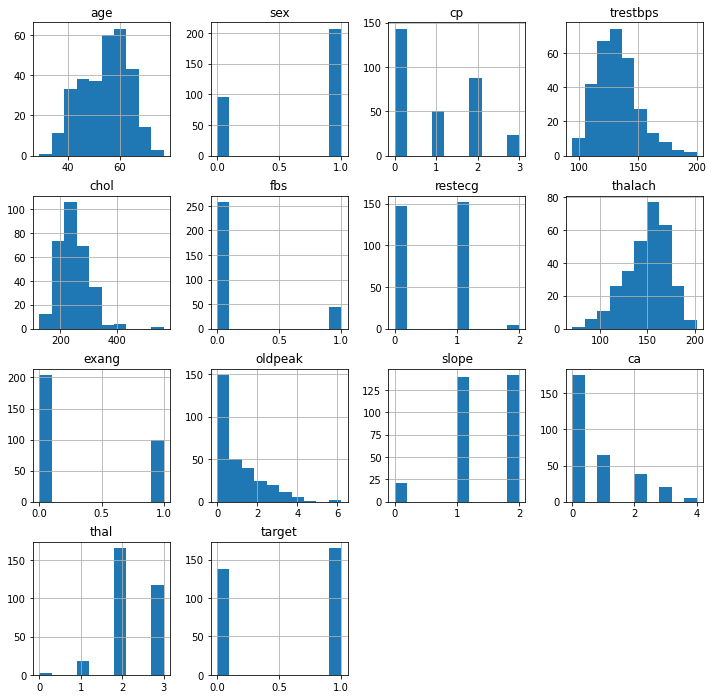

In [5]:
df.hist(figsize=(12,12))

<AxesSubplot:xlabel='age'>

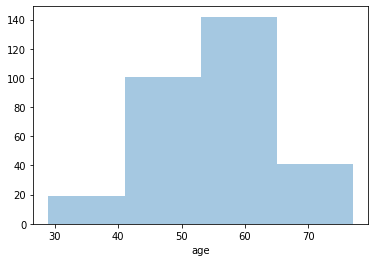

In [6]:
#80% of the people are in the range of 41-65.
sns.distplot(df["age"], bins=4, kde=False)

In [7]:
#More than 2/3 of the population in the dataset are male
total = len(df["sex"])
males = df["sex"].sum()
females = len(df["sex"]) - males
print("Porcentage of males:", round(males/total*100, 3))
print("procentage of females:", round(females/total*100, 3))

Porcentage of males: 68.317
procentage of females: 31.683


Text(0, 0.5, 'amount')

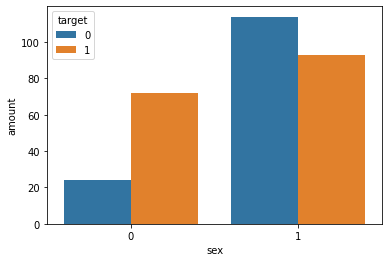

In [9]:
#There are not a huge disparity between the number of healthy and unhealthy men. The difference is more notoriuos for females.
sex_graph = sns.countplot(df["sex"], hue=df["target"])
sex_graph.set_ylabel("amount")

Text(0, 0.5, 'amount')

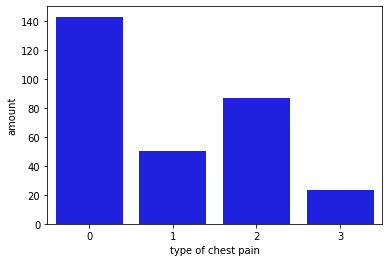

In [10]:
#Almost, half of the people are asymptomatic.
cp_graph = sns.countplot(df["cp"], color="blue")
cp_graph.set_xlabel("type of chest pain")
cp_graph.set_ylabel("amount")

In [11]:
#seperating  x and y
x = df.iloc[:,:13] 
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
y = df.iloc[:,13]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler 
x_std=StandardScaler().fit_transform(x)

In [ ]:
#splitting the dataset train and test 
from sklearn.model_selection import train_test_split

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x_std,y,test_size=0.25,random_state=40)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report


In [28]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
confusion_matrix(ytest,ypred)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72        34
           1       0.78      0.76      0.77        42

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() 
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
confusion_matrix(ytest,ypred)


array([[28,  6],
       [ 3, 39]], dtype=int64)

In [30]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        34
           1       0.87      0.93      0.90        42

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [32]:
rf=RandomForestClassifier()
sv.fit(xtrain,ytrain)
ypred=sv.predict(xtest)
confusion_matrix(ytest,ypred)

array([[26,  8],
       [ 3, 39]], dtype=int64)

In [33]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.83      0.93      0.88        42

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



In [34]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(xtrain,ytrain)
ypred=sv.predict(xtest)
confusion_matrix(ytest,ypred)

array([[26,  8],
       [ 3, 39]], dtype=int64)

In [35]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.83      0.93      0.88        42

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



# Hypertuning

In [36]:
parameters={'C':[1,10],'gamma':[0.1,0.001],'kernel':['rbf']}

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
grid=GridSearchCV(SVC(),parameters,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [0.1, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [39]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [40]:
ypred=grid.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        34
           1       0.89      0.95      0.92        42

    accuracy                           0.91        76
   macro avg       0.91      0.90      0.91        76
weighted avg       0.91      0.91      0.91        76



.I use four ML models. On average, three of them have a similar performance. The support vector machine is the only one that had a different performance. A really good number for recall, but if I do the math for other metrics the numbers are not that impressive. 
Although metrics most of the time have some trade-offs between them.

.SVM is showing the most interesting results. Due to the fact, that is already doing a great job on false negatives (but having a hard time knowing when someone is not sick). However, I think it is a good idea to choose SVM as the main model.

